### 8. Practising this workflow on another dataset

#### Tutorial Exercise: Yelp reviews

#### Introduction

This exercise uses a small subset of the data from Kaggle's [Yelp Business Rating Prediction](https://www.kaggle.com/c/yelp-recsys-2013) competition.

**Description of the data:**

- **`yelp.csv`** contains the dataset. It is stored in the repository (in the **`data`** directory), so there is no need to download anything from the Kaggle website.
- Each observation (row) in this dataset is a review of a particular business by a particular user.
- The **stars** column is the number of stars (1 through 5) assigned by the reviewer to the business. (Higher stars is better.) In other words, it is the rating of the business by the person who wrote the review.
- The **text** column is the text of the review.

**Goal:** Predict the star rating of a review using **only** the review text.

**Tip:** After each task, I recommend that you check the shape and the contents of your objects, to confirm that they match your expectations.

## Task 1

Read **`yelp.csv`** into a pandas DataFrame and examine it.

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
yelp = pd.read_csv('./pycon-2016-tutorial-master/data/yelp.csv')
yelp.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [38]:
yelp.shape

(10000, 10)

In [39]:
yelp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
business_id    10000 non-null object
date           10000 non-null object
review_id      10000 non-null object
stars          10000 non-null int64
text           10000 non-null object
type           10000 non-null object
user_id        10000 non-null object
cool           10000 non-null int64
useful         10000 non-null int64
funny          10000 non-null int64
dtypes: int64(4), object(6)
memory usage: 781.3+ KB


In [40]:
yelp['type'].value_counts()

review    10000
Name: type, dtype: int64

## Task 2

Create a new DataFrame that only contains the **5-star** and **1-star** reviews.

- **Hint:** [How do I apply multiple filter criteria to a pandas DataFrame?](http://nbviewer.jupyter.org/github/justmarkham/pandas-videos/blob/master/pandas.ipynb#9.-How-do-I-apply-multiple-filter-criteria-to-a-pandas-DataFrame%3F-%28video%29) explains how to do this.

In [41]:
yelp_1_5 = yelp[(yelp['stars'] == 1) | (yelp['stars'] == 5)]
yelp_1_5.sample(10)

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
1177,wuYbkc2hMYli2dv6nONvKw,2007-03-11,rKVjF9XlDfW_mIf_n-VrIg,5,Brookstone is the Sharper Image's older and mo...,review,l53FUDHRHLg7BQ89KgAtxQ,0,0,0
9324,DjdA1xbHki_lopCSxf-Egg,2010-01-28,eDaeNy-n_LLcnu4yHxSfjg,5,"When cowboys ride off into the sunset, they pr...",review,Vdi-fbSA36s6jffY7iDbXA,0,2,1
1574,JokKtdXU7zXHcr20Lrk29A,2009-06-13,-8Ed9HuTraLTPb-dTBxoCg,5,Four Peaks serves up some great beers and grea...,review,DZ7NafMn4ACDLcdCiWlllA,0,1,0
8146,7YYD_agS3Kb2sAx9JPkQEw,2010-11-03,8dK4ZrPWHYLkg8McqSJXvA,5,YOWZA! I love this place. I had heard great th...,review,Qgupxwm_bHehtat82fvtog,0,0,0
630,fi5TM0p_6es4QEw8SKRSfw,2010-02-21,hfUpkVDfarhfaogS_Y0YOA,5,This has by far been my favorite movie theater...,review,MBLcbQ_miC1c11cfXQRKoQ,0,0,0
3652,5llLE472tXsK620Hw14bqQ,2012-08-27,7FGx9bmNvfUzm4Aqv2kpag,1,I was very disappointed in my encounter with t...,review,pzlW6_R3eloYVQKnDAP1Ow,0,0,0
559,V6BYjHM9SnXscfkln3hCdA,2012-06-27,h3vM0J9MuqpLscQAPp5hfQ,1,We went here for Mother's Day based on the pos...,review,TwK4rCo5Q_OnEP3874xTLg,0,0,0
9570,y4bkwSDssQTlFOYZS76K7A,2011-12-29,zwTx89vgWu8IAU2DGaFpVA,5,This is the best buffet in Az. HUGE variety fr...,review,cjU6TqN3bSiW8ShYSoF-0A,0,1,0
9851,MhkZLdUFaHt5SDcQcqOWQg,2010-05-12,OXMwfR9q3WcKyMbL4BA4Xw,1,"If you like sushi, go somewhere else. I was ex...",review,LP0bl3GKToABt3lnpSvA2w,0,2,0
5958,TgxDGx7L_JICWbuBUCGVqw,2010-08-24,umXCp4bCpuVIlTI-JXn__A,5,"I found the food excellent, but keep in mind t...",review,muU7S-YE8D3FM5KgxOtFCw,0,0,0


In [42]:
yelp_1_5.shape

(4086, 10)

## Task 3

Define X and y from the new DataFrame, and then split X and y into training and testing sets, using the **review text** as the only feature and the **star rating** as the response.

- **Hint:** Keep in mind that X should be a pandas Series (not a DataFrame), since we will pass it to CountVectorizer in the task that follows.

In [43]:
X = yelp_1_5['text']
y = yelp_1_5['stars']

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 1)

In [45]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(3064,)
(3064,)
(1022,)
(1022,)


In [46]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()

In [47]:
vect.fit(X_train)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

## Task 4

Use CountVectorizer to create **document-term matrices** from X_train and X_test.

In [48]:
X_train_dtm = vect.transform(X_train)
X_train_dtm.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [49]:
X_test_dtm = vect.transform(X_test)
X_test_dtm.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

## Task 5

Use multinomial Naive Bayes to **predict the star rating** for the reviews in the testing set, and then **calculate the accuracy** and **print the confusion matrix**.

- **Hint:** [Evaluating a classification model](https://github.com/justmarkham/scikit-learn-videos/blob/master/09_classification_metrics.ipynb) explains how to interpret both classification accuracy and the confusion matrix.

In [50]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train_dtm, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [51]:
y_pred = nb.predict(X_test_dtm)

In [52]:
# Accuracy Score

from sklearn import metrics 
metrics.accuracy_score(y_test, y_pred) 

0.9187866927592955

In [53]:
# Confusion Matrix

from sklearn import metrics
cm = metrics.confusion_matrix(y_test,y_pred) 

Confusion matrix, without normalization
[[126  58]
 [ 25 813]]


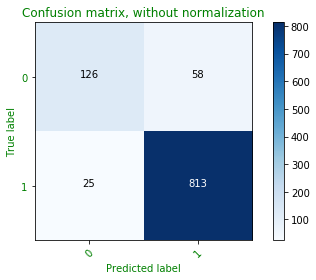

In [54]:
# From Scikit-Learn Documentation

import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title,color='green')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45,color='green')
    plt.yticks(tick_marks, classes,color='green')

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label',color='green')
    plt.xlabel('Predicted label',color='green')
    plt.tight_layout()


# Compute confusion matrix

np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cm, classes=['0','1'],
                      title='Confusion matrix, without normalization')

plt.show()

## Task 6 (Challenge)

Calculate the **null accuracy**, which is the classification accuracy that could be achieved by always predicting the most frequent class.

- **Hint:** [Evaluating a classification model](https://github.com/justmarkham/scikit-learn-videos/blob/master/09_classification_metrics.ipynb) explains null accuracy and demonstrates two ways to calculate it, though only one of those ways will work in this case. Alternatively, you can come up with your own method to calculate null accuracy!

In [55]:
y_test.value_counts().head(1) / len(y_test) 

/home/dsc/anaconda3/lib/python3.6/site-packages/numexpr/cpuinfo.py:42: UserWarning: [Errno 12] Cannot allocate memory
  warnings.warn(str(e), UserWarning, stacklevel=stacklevel)


5    0.819961
Name: stars, dtype: float64

## Task 7 (Challenge)

Browse through the review text of some of the **false positives** and **false negatives**. Based on your knowledge of how Naive Bayes works, do you have any ideas about why the model is incorrectly classifying these reviews?

- **Hint:** [Evaluating a classification model](https://github.com/justmarkham/scikit-learn-videos/blob/master/09_classification_metrics.ipynb) explains the definitions of "false positives" and "false negatives".
- **Hint:** Think about what a false positive means in this context, and what a false negative means in this context. What has scikit-learn defined as the "positive class"?

In [56]:
# False Positives

X_test[(y_pred == 5) & (y_test == 1)]

2175    This has to be the worst restaurant in terms o...
1781    If you like the stuck up Scottsdale vibe this ...
2674    I'm sorry to be what seems to be the lone one ...
9984    Went last night to Whore Foods to get basics t...
3392    I found Lisa G's while driving through phoenix...
8283    Don't know where I should start. Grand opening...
2765    Went last week, and ordered a dozen variety. I...
2839    Never Again,\nI brought my Mountain Bike in (w...
321     My wife and I live around the corner, hadn't e...
1919                                         D-scust-ing.
2490    Lazy Q CLOSED in 2010.  New Owners cleaned up ...
9125    La Grande Orange Grocery has a problem. It can...
9185    For frozen yogurt quality, I give this place a...
436     this another place that i would give no stars ...
2051    Sadly with new owners comes changes on menu.  ...
1721    This is the closest to a New York hipster styl...
3447    If you want a school that cares more about you...
842     Boy is

In [57]:
# False Negatives

X_test[(y_pred == 1) & (y_test == 5)]

7148    I now consider myself an Arizonian. If you dri...
4963    This is by far my favourite department store, ...
6318    Since I have ranted recently on poor customer ...
380     This is a must try for any Mani Pedi fan. I us...
5565    I`ve had work done by this shop a few times th...
3448    I was there last week with my sisters and whil...
6050    I went to sears today to check on a layaway th...
2504    I've passed by prestige nails in walmart 100s ...
2475    This place is so great! I am a nanny and had t...
241     I was sad to come back to lai lai's and they n...
3149    I was told to see Greg after a local shop diag...
423     These guys helped me out with my rear windshie...
763     Here's the deal. I said I was done with OT, bu...
8956    I took my computer to RedSeven recently when m...
750     This store has the most pleasant employees of ...
9765    You can't give anything less than 5 stars to a...
6334    I came here today for a manicure and pedicure....
1282    Loved 

## Task 8 (Challenge)

Calculate which 10 tokens are the most predictive of **5-star reviews**, and which 10 tokens are the most predictive of **1-star reviews**.

- **Hint:** Naive Bayes automatically counts the number of times each token appears in each class, as well as the number of observations in each class. You can access these counts via the `feature_count_` and `class_count_` attributes of the Naive Bayes model object.

In [58]:
# store the vocabulary of X_train
X_train_tokens = vect.get_feature_names()

# store the number of times each token appears across each class
one_star_token_count = nb.feature_count_[0, :]
five_star_token_count = nb.feature_count_[1, :]

# create a DataFrame of tokens with their separate one-star and five-star counts
tokens = pd.DataFrame({'token':X_train_tokens, 'one_star':one_star_token_count, 'five_star':five_star_token_count}).set_index('token')

# add 1 to one-star and five-star counts to avoid dividing by 0
tokens['one_star'] = tokens.one_star + 1
tokens['five_star'] = tokens.five_star + 1

# convert the one-star and five-star counts into frequencies
tokens['one_star'] = tokens.one_star / nb.class_count_[0]
tokens['five_star'] = tokens.five_star / nb.class_count_[1]

# calculate the ratio of five-star to one-star for each token
tokens['five_star_ratio'] = tokens.five_star / tokens.one_star

In [59]:
# sort the DataFrame by five_star_ratio (descending order), and examine the first 10 rows
# note: use sort() instead of sort_values() for pandas 0.16.2 and earlier
tokens.sort_values('five_star_ratio', ascending=False).head(10)

,five_star,one_star,five_star_ratio
token,,,
fantastic,0.077231,0.003540,21.817727
perfect,0.098039,0.005310,18.464052
yum,0.024810,0.001770,14.017607
favorite,0.138055,0.012389,11.143029
outstanding,0.019608,0.001770,11.078431
brunch,0.016807,0.001770,9.495798
gem,0.016006,0.001770,9.043617
mozzarella,0.015606,0.001770,8.817527
pasty,0.015606,0.001770,8.817527


In [60]:
# sort the DataFrame by five_star_ratio (ascending order), and examine the first 10 rows
tokens.sort_values('five_star_ratio', ascending=True).head(10)

,five_star,one_star,five_star_ratio
token,,,
staffperson,0.0004,0.030088,0.013299
refused,0.0004,0.024779,0.016149
disgusting,0.0008,0.042478,0.018841
filthy,0.0004,0.019469,0.020554
unprofessional,0.0004,0.015929,0.025121
unacceptable,0.0004,0.015929,0.025121
acknowledge,0.0004,0.015929,0.025121
ugh,0.0008,0.030088,0.026599
fuse,0.0004,0.014159,0.028261


## Task 9 (Challenge)

Up to this point, we have framed this as a **binary classification problem** by only considering the 5-star and 1-star reviews. Now, let's repeat the model building process using all reviews, which makes this a **5-class classification problem**.

Here are the steps:

- Define X and y using the original DataFrame. (y should contain 5 different classes.)
- Split X and y into training and testing sets.
- Create document-term matrices using CountVectorizer.
- Calculate the testing accuracy of a Multinomial Naive Bayes model.
- Compare the testing accuracy with the null accuracy, and comment on the results.
- Print the confusion matrix, and comment on the results. (This [Stack Overflow answer](http://stackoverflow.com/a/30748053/1636598) explains how to read a multi-class confusion matrix.)
- Print the [classification report](http://scikit-learn.org/stable/modules/model_evaluation.html#classification-report), and comment on the results. If you are unfamiliar with the terminology it uses, research the terms, and then try to figure out how to calculate these metrics manually from the confusion matrix!

In [61]:
# define X and y using the original DataFrame
X = yelp.text
y = yelp.stars

# split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# create document-term matrices using CountVectorizer
X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)

# fit a Multinomial Naive Bayes model
nb.fit(X_train_dtm, y_train)

# make class predictions
y_pred_class = nb.predict(X_test_dtm)

# calculate the accuary
metrics.accuracy_score(y_test, y_pred_class)

0.4712

In [62]:
# calculate the null accuracy
y_test.value_counts().head(1) / y_test.shape

4    0.3536
Name: stars, dtype: float64

In [63]:
# print the confusion matrix
metrics.confusion_matrix(y_test, y_pred_class)

array([[ 55,  14,  24,  65,  27],
       [ 28,  16,  41, 122,  27],
       [  5,   7,  35, 281,  37],
       [  7,   0,  16, 629, 232],
       [  6,   4,   6, 373, 443]])


Confusion matrix comments:

- Nearly all 4-star and 5-star reviews are classified as 4 or 5 stars, but they are hard for the model to distinguish between.
- 1-star, 2-star, and 3-star reviews are most commonly classified as 4 stars, probably because it's the predominant class in the training data.

In [64]:
# print the classification report
print(metrics.classification_report(y_test, y_pred_class))

             precision    recall  f1-score   support

          1       0.54      0.30      0.38       185
          2       0.39      0.07      0.12       234
          3       0.29      0.10      0.14       365
          4       0.43      0.71      0.53       884
          5       0.58      0.53      0.55       832

avg / total       0.46      0.47      0.43      2500



Precision answers the question: "When a given class is predicted, how often are those predictions correct?" To calculate the precision for class 1, for example, you divide 55 by the sum of the first column of the confusion matrix.

In [65]:
# manually calculate the precision for class 1
precision = 55 / float(55 + 28 + 5 + 7 + 6)
print(precision)

0.5445544554455446


Recall answers the question: "When a given class is the true class, how often is that class predicted?" To calculate the recall for class 1, for example, you divide 55 by the sum of the first row of the confusion matrix.

In [66]:
# manually calculate the recall for class 1
recall = 55 / float(55 + 14 + 24 + 65 + 27)
print(recall)

0.2972972972972973


F1 score is a weighted average of precision and recall.

In [67]:
# manually calculate the F1 score for class 1
f1 = 2 * (precision * recall) / (precision + recall)
print(f1)

0.38461538461538464


Support answers the question: "How many observations exist for which a given class is the true class?" To calculate the support for class 1, for example, you sum the first row of the confusion matrix.

In [68]:
# manually calculate the support for class 1
support = 55 + 14 + 24 + 65 + 27
print(support)

185


Classification report comments:

- Class 1 has low recall, meaning that the model has a hard time detecting the 1-star reviews, but high precision, meaning that when the model predicts a review is 1-star, it's usually correct.
- Class 5 has high recall and precision, probably because 5-star reviews have polarized language, and because the model has a lot of observations to learn from.